In [1]:
import pandas as pd
import numpy as np
import os

## sklearn
from sklearn.preprocessing import LabelEncoder
import xgboost
from sklearn.model_selection import train_test_split

dir_ = r'D:\data_compete\dacon\data\jeju-credit-card\\'
os.chdir(dir_)
print("MY DIRECTORY :", os.getcwd())

MY DIRECTORY : D:\data_compete\dacon\data\jeju-credit-card


In [2]:
df = pd.read_csv(dir_ + "201901-202003.csv", dtype=str)
sub_df = pd.read_csv(dir_ + "submission.csv")

In [3]:
df[["CSTMR_CNT","AMT","CNT"]] = df[["CSTMR_CNT","AMT","CNT"]].astype(float)
df[["SEX_CTGO_CD","FLC"]] = df[["SEX_CTGO_CD","FLC"]].astype(int)

In [4]:
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4.0,311200.0,4.0
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7.0,1374500.0,8.0
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6.0,818700.0,6.0
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4.0,1717000.0,5.0
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3.0,1047300.0,3.0


In [5]:
sub_df.head()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0


In [7]:
df.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [8]:
df[df.columns[:9]].duplicated().sum()

0

In [9]:
for c_ in ["STD_CLSS_NM","AGE","SEX_CTGO_CD","FLC"]:
    unique_ls = df[c_].unique().tolist()
    print("***",len(unique_ls), unique_ls)

*** 41 ['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업', '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업', '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업']
*** 7 ['20s', '30s', '40s', '50s', '60s', '70s', '10s']
*** 2 [1, 2]
*** 5 [1, 2, 3, 4, 5]


cancel_cnt = 이용자수 - 이용횟수

- cancel_cnt > 0 : 일부 이용자가 카드 취소한 경우  
- cancel_cnt < 0 : 일부 이용자가 여러번 결제   

** Count : 85036
count    85036.000000
mean         2.367738
std          4.255592
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        236.000000
Name: cancel_cnt, dtype: float64


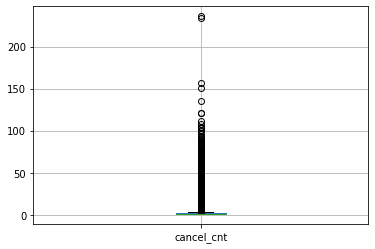

In [41]:
df_1 = df[df["cancel_cnt"] > 0]
print("** Count :", len(df_1))
print(df_1["cancel_cnt"].describe())
df_1[["cancel_cnt"]].boxplot()

** Count : 19122954
count    1.912295e+07
mean    -8.276689e+01
std      7.365802e+02
min     -8.807800e+04
25%     -2.200000e+01
50%     -6.000000e+00
75%     -2.000000e+00
max     -1.000000e+00
Name: cancel_cnt, dtype: float64


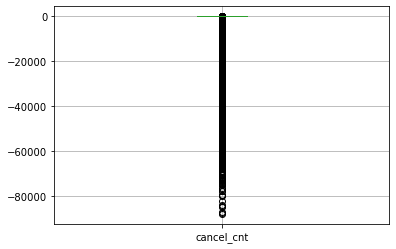

In [40]:
df_2 = df[df["cancel_cnt"] < 0]
print("** Count :", len(df_2))
print(df_2["cancel_cnt"].describe())
df_2[["cancel_cnt"]].boxplot()

In [127]:
df["cancel_cnt"] = df["CSTMR_CNT"] - df["CNT"]
df_sel = df[(df["cancel_cnt"] <= 0) & (df["REG_YYMM"] >= "201912")]

In [128]:

#df_sel["key"] = df_sel['REG_YYMM'] +"_"+ df_sel['CARD_SIDO_NM'] +"_" + df_sel['STD_CLSS_NM']

In [129]:
columns = ['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC']
X_cols = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', "year","month"]
y_cols = ["AMT"]

df_sel = df_sel.groupby(columns)[y_cols].sum().reset_index(drop=False)

In [130]:
df_sel['year'] = df_sel['REG_YYMM'].str[:4].astype(int)
df_sel['month'] = df_sel['REG_YYMM'].str[4:].astype(int)

In [131]:
df_sel = df_sel[df_sel['AMT'] <= 8000000]

In [132]:
dtypes = df_sel.dtypes
encoders = {}
for column in df_sel.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_sel[column])
        encoders[column] = encoder
        
df_num = df_sel.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df_sel[column])

In [133]:
X_train, y_train = df_num[X_cols][df_sel["REG_YYMM"]<="202001"].values,  np.log1p(df_num[y_cols][df_sel["REG_YYMM"]<="202001"].values)
X_test, y_test = df_num[X_cols][df_sel["REG_YYMM"]>"202001"].values,  np.log1p(df_num[y_cols][df_sel["REG_YYMM"]>"202001"].values)

In [134]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=X_cols)

In [135]:
def rmsle(real, predicted):
    sum_=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum_ = sum_ + (p - r)**2
    return (sum_/len(predicted))**0.5

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

rmsle_score = make_scorer(rmsle, greater_is_better=False)

rf = RandomForestRegressor(random_state=1839, n_jobs=4, verabose=2)
rf.fit(X_train,y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3, scoring=rmsle_score)
print(np.mean(rf_scores))

In [137]:
xgb_reg=xgboost.XGBRegressor(booster='gbtree', 
                             colsample_bylevel=0.9, 
                             colsample_bytree=0.8, 
                             gamma=0, 
                             max_depth=10, 
                             min_child_weight=3, 
                             n_estimators=5000, 
                             nthread=4, 
                             objective='reg:linear', 
                             random_state=208)

xgb_reg.fit(X_train,y_train,
            eval_set=[(X_test,y_test)],
            eval_metric = 'rmse',
            early_stopping_rounds=100)

[22:24:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11.4414
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:10.311
[2]	validation_0-rmse:9.29589
[3]	validation_0-rmse:8.38534
[4]	validation_0-rmse:7.56761
[5]	validation_0-rmse:6.83444
[6]	validation_0-rmse:6.17724
[7]	validation_0-rmse:5.58827
[8]	validation_0-rmse:5.06096
[9]	validation_0-rmse:4.59058
[10]	validation_0-rmse:4.17175
[11]	validation_0-rmse:3.79741
[12]	validation_0-rmse:3.46507
[13]	validation_0-rmse:3.17196
[14]	validation_0-rmse:2.91338
[15]	validation_0-rmse:2.685
[16]	validation_0-rmse:2.48537
[17]	validation_0-rmse:2.31016
[18]	validation_0-rmse:2.16123
[19]	validation_0-rmse:2.03058
[20]	validation_0-rmse:1.91841
[21]	validation_0-rmse:1.8229
[22]	validation_0-rmse:1.73941
[23]	validation_0-rmse:1.67028
[24]	validation_0-rmse:1.6135
[25]	valid

[253]	validation_0-rmse:1.12337
[254]	validation_0-rmse:1.1233
[255]	validation_0-rmse:1.12331
[256]	validation_0-rmse:1.12329
[257]	validation_0-rmse:1.12347
[258]	validation_0-rmse:1.12353
[259]	validation_0-rmse:1.12269
[260]	validation_0-rmse:1.12263
[261]	validation_0-rmse:1.12094
[262]	validation_0-rmse:1.12106
[263]	validation_0-rmse:1.12116
[264]	validation_0-rmse:1.12135
[265]	validation_0-rmse:1.12148
[266]	validation_0-rmse:1.12173
[267]	validation_0-rmse:1.12139
[268]	validation_0-rmse:1.11968
[269]	validation_0-rmse:1.11975
[270]	validation_0-rmse:1.11982
[271]	validation_0-rmse:1.11988
[272]	validation_0-rmse:1.11996
[273]	validation_0-rmse:1.11958
[274]	validation_0-rmse:1.11931
[275]	validation_0-rmse:1.11888
[276]	validation_0-rmse:1.11793
[277]	validation_0-rmse:1.11745
[278]	validation_0-rmse:1.11706
[279]	validation_0-rmse:1.1166
[280]	validation_0-rmse:1.1166
[281]	validation_0-rmse:1.11626
[282]	validation_0-rmse:1.11601
[283]	validation_0-rmse:1.11605
[284]	valid

[511]	validation_0-rmse:1.10208
[512]	validation_0-rmse:1.10212
[513]	validation_0-rmse:1.10217
[514]	validation_0-rmse:1.10214
[515]	validation_0-rmse:1.10198
[516]	validation_0-rmse:1.10201
[517]	validation_0-rmse:1.10211
[518]	validation_0-rmse:1.10221
[519]	validation_0-rmse:1.10238
[520]	validation_0-rmse:1.10236
[521]	validation_0-rmse:1.10258
[522]	validation_0-rmse:1.1027
[523]	validation_0-rmse:1.10269
[524]	validation_0-rmse:1.10279
[525]	validation_0-rmse:1.10266
[526]	validation_0-rmse:1.10277
[527]	validation_0-rmse:1.10279
[528]	validation_0-rmse:1.10272
[529]	validation_0-rmse:1.10251
[530]	validation_0-rmse:1.10262
[531]	validation_0-rmse:1.10279
[532]	validation_0-rmse:1.10253
[533]	validation_0-rmse:1.10242
[534]	validation_0-rmse:1.10251
[535]	validation_0-rmse:1.10227
[536]	validation_0-rmse:1.10221
[537]	validation_0-rmse:1.10215
[538]	validation_0-rmse:1.10236
[539]	validation_0-rmse:1.10245
[540]	validation_0-rmse:1.10253
[541]	validation_0-rmse:1.10244
[542]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=5000,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=208,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [97]:
temp

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month
0,0,0,0,1,2,1,2020,4
1,0,0,0,1,2,1,2020,7
2,0,0,0,1,2,2,2020,4
3,0,0,0,1,2,2,2020,7
4,0,0,0,1,2,3,2020,4
...,...,...,...,...,...,...,...,...
1658855,16,30,4,0,1,3,2020,7
1658856,16,30,4,0,1,4,2020,4
1658857,16,30,4,0,1,4,2020,7
1658858,16,30,4,0,1,5,2020,4


In [138]:
# 예측
pred = xgb_reg.predict(temp.values)
pred = np.expm1(pred)


In [139]:
temp['AMT'] = pred
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [140]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [141]:
temp

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,202004,강원,건강보조식품 소매업,1.791376e+08
1,202004,강원,골프장 운영업,5.282084e+08
2,202004,강원,과실 및 채소 소매업,4.427274e+08
3,202004,강원,관광 민예품 및 선물용품 소매업,5.450318e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,1.999801e+07
...,...,...,...,...
1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.844035e+08
1390,202007,충북,한식 음식점업,5.754113e+09
1391,202007,충북,호텔업,1.036529e+08
1392,202007,충북,화장품 및 방향제 소매업,2.233617e+08


In [142]:

# 제출 파일 만들기
submission = pd.read_csv('submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission_20200628_xgb2.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,179137568.0
1,202004,강원,골프장 운영업,528208352.0
2,202004,강원,과실 및 채소 소매업,442727360.0
3,202004,강원,관광 민예품 및 선물용품 소매업,54503176.0
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,19998006.0


In [143]:
submission

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,1.791376e+08
1,202004,강원,골프장 운영업,5.282084e+08
2,202004,강원,과실 및 채소 소매업,4.427274e+08
3,202004,강원,관광 민예품 및 선물용품 소매업,5.450318e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,1.999801e+07
...,...,...,...,...
1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.844035e+08
1390,202007,충북,한식 음식점업,5.754113e+09
1391,202007,충북,호텔업,1.036529e+08


In [144]:
df_sel.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'])["AMT"].sum().reset_index(drop=False)

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201912,강원,건강보조식품 소매업,19758100.0
1,201912,강원,골프장 운영업,96473050.0
2,201912,강원,과실 및 채소 소매업,91496720.0
3,201912,강원,관광 민예품 및 선물용품 소매업,29917200.0
4,201912,강원,그외 기타 스포츠시설 운영업,6566300.0
...,...,...,...,...
2486,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,71773290.0
2487,202003,충북,한식 음식점업,324701970.0
2488,202003,충북,호텔업,15248550.0
2489,202003,충북,화장품 및 방향제 소매업,28170595.0
